# Оптимизация выпуклых функций

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Метод дихотомии

In [2]:
def f(x):
    return x + 2 / x


a = 1
b = 2
eps = 1e-4

In [3]:
def dichotomy_method(f, a, b, delta, eps, max_iters=1000):
    
    iters = 0
    
    while abs(a - b) >= eps and iters < max_iters:
        m = (a + b) / 2
        c, d = m - delta / 2, m + delta / 2
        
        if f(c) <= f(d):
            b = d
        else:
            a = c
            
        iters += 1
        
    return (a + b) / 2, iters

In [4]:
x_star, iters = dichotomy_method(f=f, a=a, b=b, delta=1e-5, eps=eps)
print('x* =', x_star)
print('iters:', iters)

x* = 1.4142159457397456
iters: 14


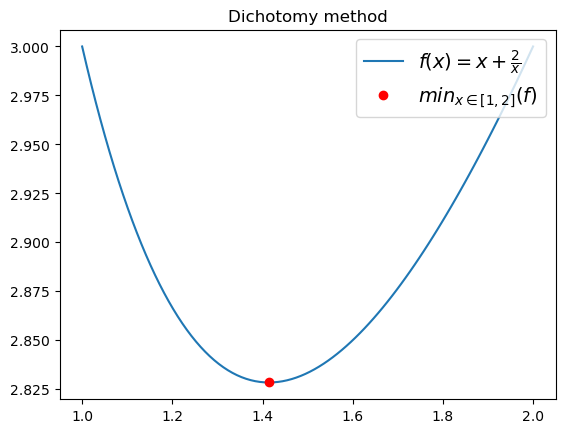

In [5]:
X = np.linspace(a, b, 100)
Y = f(X)

plt.plot(X, Y, label='$ f(x) = x + \\frac{2}{x} $')
plt.plot(x_star, f(x_star), 'ro', label=f'$ min_{{x \\in [{a}, {b}]}} (f) $')
plt.title('Dichotomy method')
plt.legend(loc='upper right', prop={'size': 14})
None

## Метод золотого сечения

In [6]:
def f(x):
    return np.log(1 + (x**3 - 2)**2)


a = -1
b = 2
eps = 1e-4

In [7]:
def golden_section_method(f, a, b, delta, eps, max_iters=1000):
    iters = 0
    
    PHI = (1 + 5**(1/2)) / 2
    c = b - (b - a) / PHI
    d = a + (b - a) / PHI
    fc = f(c)
    fd = f(d)
    
    while abs(a - b) >= eps and iters < max_iters:
        if fc >= fd:
            a = c
            
            c = d
            fc = fd
            
            d = a + (b - a) / PHI
            fd = f(d)
        else:
            b = d
            
            d = c
            fd = fc
            
            c = b - (b - a) / PHI
            fc = f(c)
            
        iters += 1
        
    return (a + b) / 2, iters

In [8]:
x_star, iters = golden_section_method(f=f, a=a, b=b, delta=1e-5, eps=eps)
print('x* =', x_star)
print('iters:', iters)

x* = 1.259927997645831
iters: 22


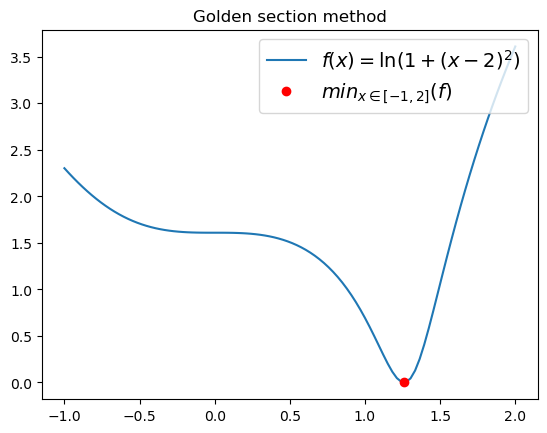

In [9]:
X = np.linspace(a, b, 100)
Y = f(X)

plt.plot(X, Y, label='$ f(x) = \\ln(1 + (x - 2)^2) $')
plt.plot(x_star, f(x_star), 'ro', label=f'$ min_{{x \\in [{a}, {b}]}} (f) $')
plt.title('Golden section method')
plt.legend(loc='upper right', prop={'size': 14})
None

## Метод касательных

In [10]:
def f(x):
    return x + 2 / x


a = 1
b = 2

In [11]:
def df(x, df_eps=1e-3):
    return (f(x + df_eps) - f(x)) / (df_eps)

In [12]:
def tangent_method(f, a, b, eps, df_eps=1e-3, max_iters=1000):
    iters = 0
    
    while iters < max_iters:
        iters += 1
        c = (a + b) / 2
        
        if abs(df(c, df_eps=df_eps)) < eps:
            break
            
        if df(c, df_eps=eps) < 0:
            a = c
        else:
            b = c
        
    return c, iters

In [13]:
x_star, iters = tangent_method(f=f, a=a, b=b, eps=1e-3, df_eps=1e-1)
print('x* =', x_star)
print('iters:', iters)

x* = 1.4137136507611836
iters: 1000


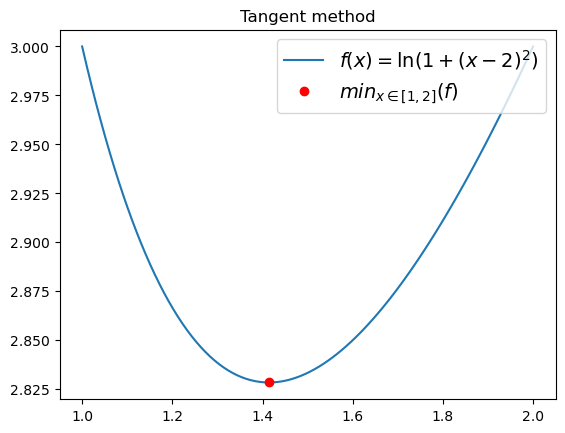

In [14]:
X = np.linspace(a, b, 100)
Y = f(X)

plt.plot(X, Y, label='$ f(x) = \\ln(1 + (x - 2)^2) $')
plt.plot(x_star, f(x_star), 'ro', label=f'$ min_{{x \\in [{a}, {b}]}} (f) $')
plt.title('Tangent method')
plt.legend(loc='upper right', prop={'size': 14})
None

## Метод Ньютона

In [15]:
def f(x):
    return x + 2 / x


a = 1
b = 2

In [16]:
def df(x, df_eps=1e-3):
    return (f(x + df_eps) - f(x)) / (df_eps)

In [17]:
def d2f(x, df_eps=1e-3):
    return (df(x + df_eps) - df(x)) / (df_eps)

In [18]:
def newton_method(f, a, b, eps, x0=1, max_iters=1000):
    iters = 0
    x = x0
    
    while iters < max_iters:
        iters += 1
        x_prev = x
        x = x_prev -  df(x_prev) / d2f(x_prev)
        
        if abs(x - x_prev) < eps:
            break
        
    return x, iters

In [24]:
x0 = 1.1
x_star, iters = newton_method(f=f, a=a, b=b, eps=1e-3, x0=x0)
print('x* =', x_star)
print('iters:', iters)

x* = 1.4137137341480819
iters: 4


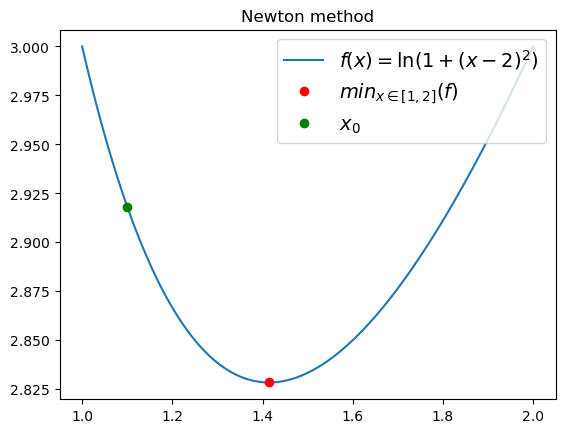

In [25]:
X = np.linspace(a, b, 100)
Y = f(X)

plt.plot(X, Y, label='$ f(x) = \\ln(1 + (x - 2)^2) $')
plt.plot(x_star, f(x_star), 'ro', label=f'$ min_{{x \\in [{a}, {b}]}} (f) $')
plt.plot(x0, f(x0), 'go', label=f'$ x_0 $')
plt.title('Newton method')
plt.legend(loc='upper right', prop={'size': 14})
None